# <b><center>AMAZON Stock Analysis and Prediction</b></center>

In [12]:
import pandas as pd

df = pd.read_csv('AMZN.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-09-15,0.183333,0.183854,0.152604,0.154688,0.154688,111672000
1,1997-09-16,0.156250,0.177083,0.155990,0.167708,0.167708,128640000
2,1997-09-17,0.172917,0.175000,0.166667,0.170313,0.170313,52152000
3,1997-09-18,0.171875,0.173438,0.164063,0.164583,0.164583,42576000
4,1997-09-19,0.169010,0.204167,0.168750,0.197396,0.197396,178584000
...,...,...,...,...,...,...,...
6538,2023-09-08,136.860001,138.850006,136.750000,138.229996,138.229996,38348200
6539,2023-09-11,138.750000,143.619995,138.639999,143.100006,143.100006,56764500
6540,2023-09-12,142.320007,143.000000,140.610001,141.229996,141.229996,42668500
6541,2023-09-13,140.949997,144.979996,140.869995,144.850006,144.850006,60465200


In [13]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1997-09-15,0.154688
1,1997-09-16,0.167708
2,1997-09-17,0.170313
3,1997-09-18,0.164583
4,1997-09-19,0.197396
...,...,...
6538,2023-09-08,138.229996
6539,2023-09-11,143.100006
6540,2023-09-12,141.229996
6541,2023-09-13,144.850006


In [14]:
df['Date']

0       1997-09-15
1       1997-09-16
2       1997-09-17
3       1997-09-18
4       1997-09-19
           ...    
6538    2023-09-08
6539    2023-09-11
6540    2023-09-12
6541    2023-09-13
6542    2023-09-14
Name: Date, Length: 6543, dtype: object

In [15]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [16]:
df

,Date,Close
0,1997-09-15,0.154688
1,1997-09-16,0.167708
2,1997-09-17,0.170313
3,1997-09-18,0.164583
4,1997-09-19,0.197396
...,...,...
6538,2023-09-08,138.229996
6539,2023-09-11,143.100006
6540,2023-09-12,141.229996
6541,2023-09-13,144.850006


In [17]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Swaprabha Dey\AppData\Local\Temp\ipykernel_3180\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1997-09-15
1      1997-09-16
2      1997-09-17
3      1997-09-18
4      1997-09-19
          ...    
6538   2023-09-08
6539   2023-09-11
6540   2023-09-12
6541   2023-09-13
6542   2023-09-14
Name: Date, Length: 6543, dtype: datetime64[ns]

In [18]:
df.index = df.pop('Date')
df

,Close
Date,
1997-09-15,0.154688
1997-09-16,0.167708
1997-09-17,0.170313
1997-09-18,0.164583
1997-09-19,0.197396
...,...
2023-09-08,138.229996
2023-09-11,143.100006
2023-09-12,141.229996


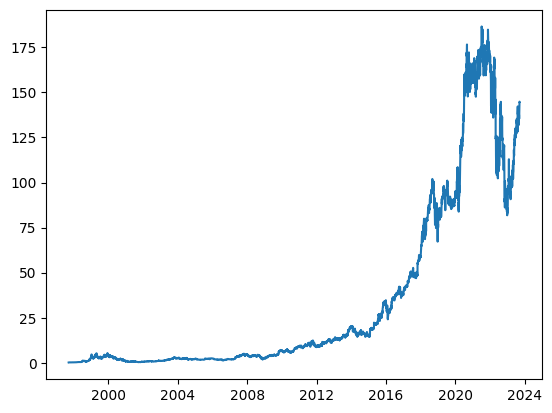

In [19]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [20]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,155.543503,156.875000,154.353500,152.313004
1,2021-03-26,156.875000,154.353500,152.313004,152.601501
2,2021-03-29,154.353500,152.313004,152.601501,153.786499
3,2021-03-30,152.313004,152.601501,153.786499,152.764496
4,2021-03-31,152.601501,153.786499,152.764496,154.703995
...,...,...,...,...,...
247,2022-03-17,141.852997,147.366501,153.104004,157.238998
248,2022-03-18,147.366501,153.104004,157.238998,161.250504
249,2022-03-21,153.104004,157.238998,161.250504,161.491501
250,2022-03-22,157.238998,161.250504,161.491501,164.889008


In [21]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

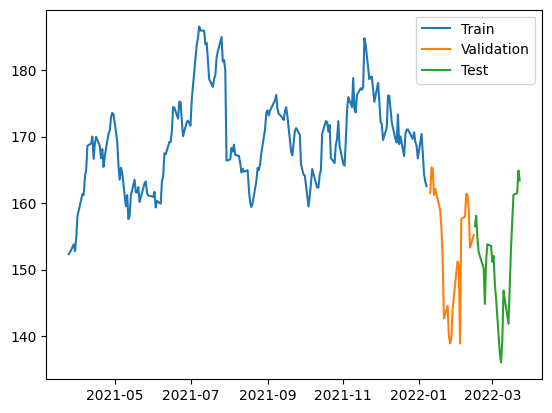

In [22]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 140ms/step - loss: 28754.5820 - mean_absolute_error: 169.4290 - val_loss: 23425.6406 - val_mean_absolute_error: 152.8154
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 28605.2441 - mean_absolute_error: 168.9881 - val_loss: 23287.6582 - val_mean_absolute_error: 152.3634
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 28445.8184 - mean_absolute_error: 168.5149 - val_loss: 23127.8398 - val_mean_absolute_error: 151.8380
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 28250.5977 - mean_absolute_error: 167.9355 - val_loss: 22922.2266 - val_mean_absolute_error: 151.1593
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 27994.0977 - mean_absolute_error: 167.1697 - val_loss: 22643.6875 - val_mean_absolute_error: 150.2351
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 27656.1562 - mean_absolute_error: 166.1545 - val_loss: 22

7/7 [==============================] - 1s 4ms/step


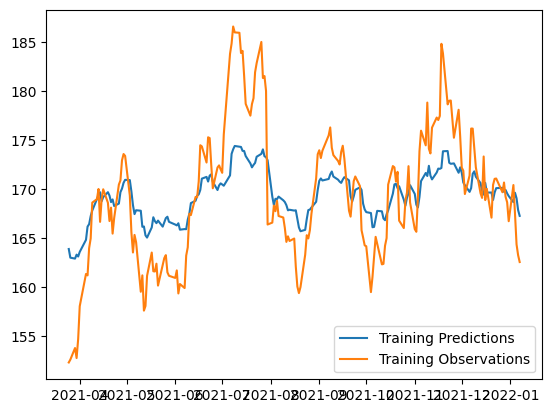

In [24]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


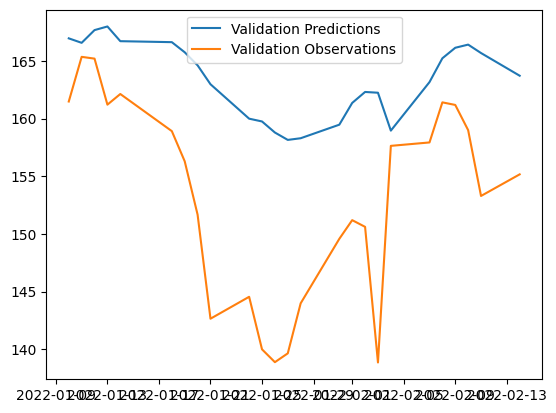

In [25]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 29ms/step


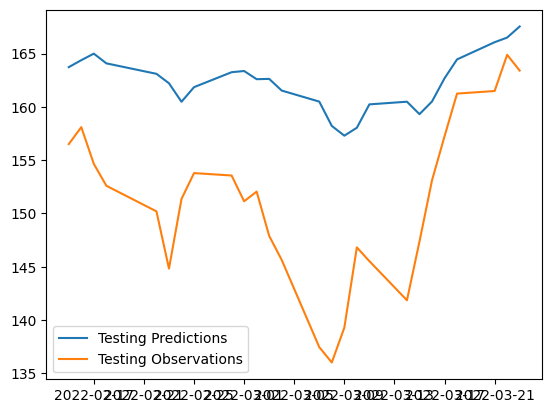

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

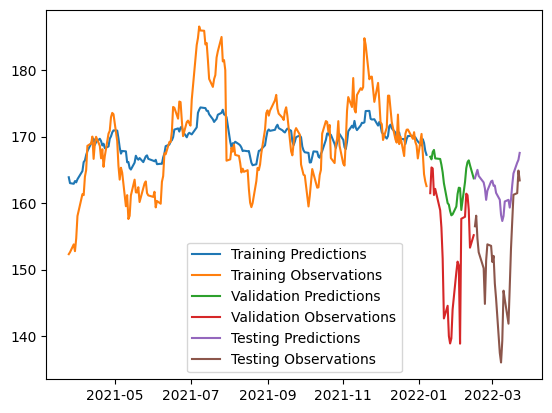

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [28]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 31ms/step


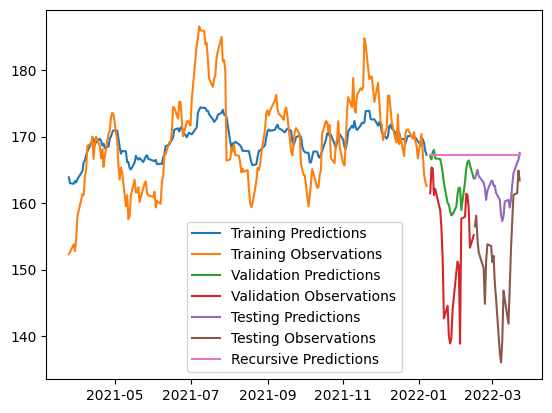

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])